In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import numpy as np
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [4]:
X_train = np.load('X_train.npy')
X_test = np.load('X_test.npy')
y_train = np.load('y_train_fixed.npy')
y_test = np.load('y_test_fixed.npy')

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
#hyperparamater tuning
param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [10, 11, 12, 13],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Estimator:", grid_search.best_estimator_)

Best Parameters: {'bootstrap': True, 'max_depth': 11, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best Estimator: RandomForestClassifier(max_depth=11, min_samples_leaf=2, min_samples_split=5)


In [11]:
# random forest
rf_model = RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=150, random_state=42)
# fitting to data
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=150, random_state=42)

Accuracy: 37.00%


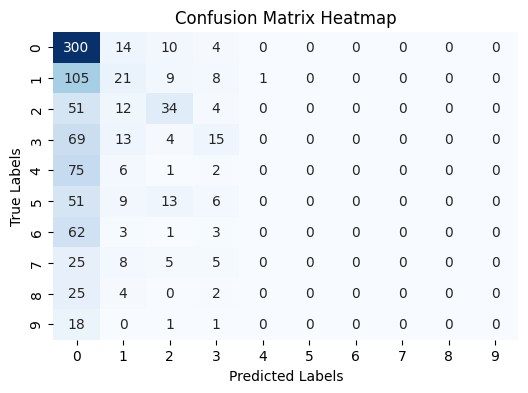

In [12]:
#evaluate
y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)

plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
# conf_matrix

In [7]:
# cross validation
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [17]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# tenfold cross validation
scores = cross_val_score(rf_model, X_train, y_train, cv=cv, scoring='accuracy')

print("Cross-validation accuracy:", scores.mean())
print("Fold scores:", scores)

Cross-validation accuracy: 0.368
Fold scores: [0.36444444 0.38555556 0.37555556 0.36       0.35222222 0.37333333
 0.37777778 0.37       0.35888889 0.36222222]
